## Ordering population structures by increasing cooperativeness

Import packages and set up general stuff.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("white")
sns.set_style("ticks")

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble="\usepackage{color}")
plt.rc('text.latex', preamble="\usepackage{amsmath}")

For $d = 2$, the structure coefficients for the death-Birth process on a cycle are given by $\sigma_0=1$ and $\sigma_1 = (3N-8)/N$.
For $d \geq 3$, they are given by (see Table 1 in the paper)

$\sigma_j = \left\{ \begin{array}{ll} 1  & \mbox{if } j=0 \\ \frac{2N}{N+1} & \mbox{if } 1 \leq j \leq d-3 \\ \frac{2N-1}{N+1} & \mbox{if } j = d-2 \\ \frac{3(N-d)}{N+1} & \mbox{if } j = d-1 \end{array} \right.$

The structure coefficients for the Moran process on a group splitting model in the limit of rare splitting are given by (see Table 1 in the paper)

$\sigma_j = \left\{ \begin{array}{ll} 1  & \mbox{if } 0 \leq j \leq d-2 \\ 1+\frac{d(m-2)}{n} & \mbox{if } j = d-1 \end{array} \right.$

Without loss of generality, the structure coefficients can be multiplied by a positive constant. For convenience, we multiply the structure coefficients of the cycle by $N$ (for $d=2$) and by $N+1$ (for $d \geq 3$) and those of the group splitting model by $n$.

In [6]:
def sigmas_cycle(N,d): # N is the population size; d is the number of players
    if d == 2:
        return np.array([N,3*N-8])
    elif d == 3:
        sigmas = np.array([N+1,2*N-1,3*N-9])
    else:
        sigmas = np.append(N+1,2*N*np.ones(d-3))
        sigmas = np.append(sigmas,2*N-1)
        sigmas = np.append(sigmas,3*(N-d))
    return sigmas

def sigmas_group_splitting(m,n,d): # m is the number of groups; n is the maximum group size; d is the number of players
    return np.append(n*np.ones(d-1),n+d*(m-2))

We normalize the structure coefficients so that they describe a probability distribution.

In [7]:
def normalize(sigmas):
    return sigmas/(1.*(np.sum(sigmas)))

The following code reproduces Fig. 2 in the paper.

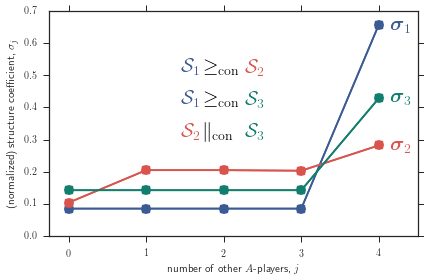

In [9]:
color1 = sns.xkcd_rgb["denim blue"]
color2 = sns.xkcd_rgb["pale red"]
color3 = sns.xkcd_rgb["blue green"]

sigmas_1 = normalize(sigmas_group_splitting(10,6,5))
sigmas_2 = normalize(sigmas_cycle(60,5))
sigmas_3 = normalize(sigmas_group_splitting(6,10,5))

label_1 = "$\\boldsymbol{\\sigma}_1$"
label_2 = "$\\boldsymbol{\\sigma}_2$"
label_3 = "$\\boldsymbol{\\sigma}_3$"

ks = np.arange(5)
plt.plot(ks,sigmas_1,color=color1)
plt.plot(ks,sigmas_1,color=color1,marker='o',markersize=10,label=label_1)
plt.plot(ks,sigmas_2,color=color2)
plt.plot(ks,sigmas_2,color=color2,marker='o',markersize=10,label=label_2)
plt.plot(ks,sigmas_3,color=color3)
plt.plot(ks,sigmas_3,color=color3,marker='o',markersize=10,label=label_3)
plt.xlabel('number of other $A$-players, $j$')
plt.ylabel('(normalized) structure coefficient, $\\sigma_j$')
plt.axis([-0.25, 4.5, 0, 0.7])
plt.xticks(np.arange(0, 5, 1.0))

plt.text(1.45,.5,'$\mathcal{S}_1$',color=color1,fontsize=20)
plt.text(1.75,.5,'$\geq_{\mathrm{con}}$',color='k',fontsize=20)
plt.text(2.275,.5,'$\mathcal{S}_2$',color=color2,fontsize=20)

plt.text(1.45,.4,'$\mathcal{S}_1$',color=color1,fontsize=20)
plt.text(1.75,.4,'$\geq_{\mathrm{con}}$',color='k',fontsize=20)
plt.text(2.275,.4,'$\mathcal{S}_3$',color=color3,fontsize=20)

plt.text(1.45,.3,'$\mathcal{S}_2$',color=color2,fontsize=20)
plt.text(1.75,.3,'$\parallel_{\mathrm{con}}$',color='k',fontsize=20)
plt.text(2.275,.3,'$\mathcal{S}_3$',color=color3,fontsize=20)

plt.text(4.15,.63,'$\\boldsymbol{\\sigma}_1$',color=color1,fontsize=20)
plt.text(4.15,.26,'$\\boldsymbol{\\sigma}_2$',color=color2,fontsize=20)
plt.text(4.15,.41,'$\\boldsymbol{\\sigma}_3$',color=color3,fontsize=20)

plt.tight_layout()
#plt.savefig('Fig2.pdf')

The volume of all $d$-player cooperation games is given by (see Eq. 8)

$ \text{Vol} \left( \mathcal{P} \right) = \frac{1}{(d!)^2} - \frac{1}{(2d)!}$

In [10]:
def volP(d):
    return 1./(np.math.factorial(d)**2) - 1./np.math.factorial(2*d)

For population structures with symmetric structure coefficients, i.e., $\sigma_j = \sigma_{d-1-j}$ for all $j$, the fraction of cooperation games for which cooperation is favored is equal to (see Eq. 9)

$\frac{\text{Vol}(\mathcal{Q})}{\text{Vol}(\mathcal{P})} = \frac{1}{2} \frac{(2 d)!}{(2d)!-(d!)^2}$

In [11]:
def volQP(d):
    return (1./2)*np.math.factorial(2*d)/(np.math.factorial(2*d)-np.math.factorial(d)**2)

The following code reproduces Fig. 3 in the paper.

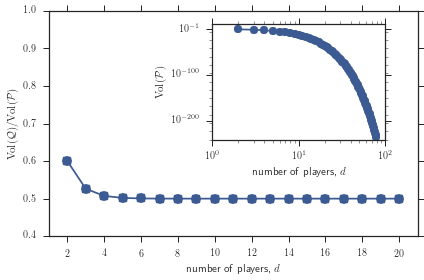

In [14]:
color1 = sns.xkcd_rgb["denim blue"]

dsp = np.arange(2,80)
dsq = np.arange(2,21)

volp = np.zeros(len(dsp))
volqp = np.zeros(len(dsq))

for i in range(len(volp)):
    volp[i] = volP(dsp[i])
    
for i in range(len(volqp)):
    volqp[i] = volQP(dsq[i])

plt.plot(dsq,volqp,color=color1,marker='o',markersize=10)
plt.xlim(1,21)
plt.ylim(0.5,1.)
plt.xticks(np.array([2,4,6,8,10,12,14,16,18,20]))
plt.yticks(np.array([0.4,0.5,0.6,0.7,0.8,0.9,1.0]))
plt.xlabel("number of players, $d$")
plt.ylabel("$\mathrm{Vol}(\mathcal{Q})/\mathrm{Vol}(\mathcal{P})$")
    
plt.axes([.5, .5, .4, .4])

plt.loglog(dsp,volp,color=color1,marker='o',markersize=8)
plt.ylim(10**(-240),10**10)
plt.yticks(np.array([10**(-1),10**(-100),10**(-200)]))
plt.xlabel("number of players, $d$")
plt.ylabel("$\mathrm{Vol}(\mathcal{P})$")

plt.tight_layout()
#plt.savefig('Fig3.pdf')

The following code implements a Monte Carlo method to estimate (normalized) volumes of $\mathcal{Q}$ (the polytope of cooperation games that are favored by selection under a given population structure).

In [32]:
def estimate_vol_MC(n_games,sigmas):
    d = len(sigmas) # get number of players    
    A = np.random.uniform(low=0,high=1,size=(n_games,d)) # generate random payoff sequences $a_j$
    A = np.sort(A,axis=1) # sort them so that the sequences are increasing
    B = np.random.uniform(low=0,high=1,size=(n_games,d)) # generate random payoff sequences $b_j$
    B = np.sort(B,axis=1) # sort them so that the sequence is increasing
    # up to this point all random games satisfy a_{j+1} >= a_j and b_{j+1} >= b_j (Eq. 1 in the paper)
    cond_mutual = A[:,d-1] > B[:,0] # check condition a_{d-1} > b_0 (Eq. 2 in the paper)
    ind = np.where(cond_mutual == True)[0] # get indices of games satisfying the conditions of a cooperation game
    n_coopgames = len(ind) # get the number of cooperation games
    F = A[ind] - np.fliplr(B[ind]) # calculate the gains from flipping a_j - b_{d-1-j}
    EF = np.sum(sigmas*1. * F,axis=1) # calculate the expected gains from flipping
    normalized_vol = np.sum(EF > 0)*1. / n_coopgames # calculate fraction of games for which cooperation is favored
        
    return n_coopgames, normalized_vol

The following code calls estimate_vol_MC for the two population structures used as examples in Fig. 4. and for several values of $d$, the number of players (This can take a while...)

In [43]:
n_games = 10**6 # number of games (point) to sample

ds = np.arange(2,31) # range of d

n_coopgames = np.zeros(len(ds))
vol_1 = np.zeros(len(ds))
vol_2 = np.zeros(len(ds))

for i in range(len(ds)):
    d = ds[i]
    sigmas_1 = sigmas_cycle(1000,d) # a cycle of size N = 1000
    sigmas_2 = sigmas_group_splitting(10,100,d) # group splitting model with m=10 groups of maximum size n=100
    n_coopgames[i], vol_1[i] = estimate_vol_MC(n_games,sigmas_1)
    n_coopgames[i], vol_2[i] = estimate_vol_MC(n_games,sigmas_2)

Save data to text file.

In [46]:
np.savetxt('vol1.out', vol_1, delimiter=',')
np.savetxt('vol2.out', vol_2, delimiter=',')

The following code reproduces Fig. 4 in the paper. The data for the numerical estimates was generated using the code above and saved to text files.

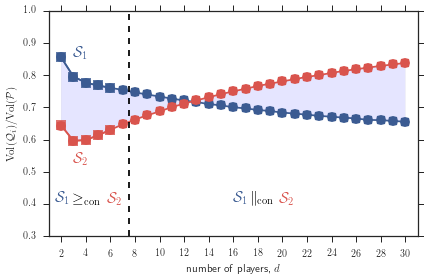

In [16]:
# load data
vol1 = np.loadtxt('vol1_paper.out')
vol2 = np.loadtxt('vol2_paper.out')

# define colors
color1 = sns.xkcd_rgb["denim blue"]
color2 = sns.xkcd_rgb["pale red"]

ds = np.arange(2,31) # range of d for the numerical estimation
ds_exact = np.arange(2,7) # range of d for the exact results

# exact results (obtained from the Sage worksheet exact_volumes.sws)
vol1_exact = np.array([0.85516194,  0.79598249,  0.777039,  0.76807489,  0.76099549])
vol2_exact = np.array([0.64416259, 0.59583647, 0.59896481, 0.61385155, 0.63065415])

plt.plot(ds_exact,vol1_exact,color=color1,marker='s',markersize=10,alpha=0.8,label="$\mathcal{S}_1$ (exact)")
plt.plot(ds,vol1,color=color1,marker='o',markersize=10,label="$\mathcal{S}_1$ (simulations)")

plt.plot(ds_exact,vol2_exact,color=color2,marker='s',markersize=10,alpha=0.8,label="$\mathcal{S}_2$ (exact)")
plt.plot(ds,vol2,color=color2,marker='o',markersize=10,label="$\mathcal{S}_2$ (simulations)")

plt.fill_between(ds, vol1, vol2, facecolor='b', alpha=0.1)

plt.axvline(x=7.5,color='k',ls='--')
plt.axis([1, np.max(ds)+1, 0.3, 1])
plt.xticks(np.array([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]))
plt.xlabel('number of players, $d$')
plt.ylabel('$\mathrm{Vol}(\mathcal{Q}_i)/\mathrm{Vol}(\mathcal{P})$')

plt.text(3,.85,'$\mathcal{S}_1$',color=color1,fontsize=15)
plt.text(3,.525,'$\mathcal{S}_2$',color=color2,fontsize=15)

plt.text(1.5,.4,'$\mathcal{S}_1$',color=color1,fontsize=15)
plt.text(3,.4,'$\geq_{\mathrm{con}}$',color='k',fontsize=15)
plt.text(5.75,.4,'$\mathcal{S}_2$',color=color2,fontsize=15)

plt.text(16,.4,'$\mathcal{S}_1$',color=color1,fontsize=15)
plt.text(17.5,.4,'$\parallel_{\mathrm{con}}$',color='k',fontsize=15)
plt.text(19.75,.4,'$\mathcal{S}_2$',color=color2,fontsize=15)

plt.tight_layout()
plt.savefig('Fig4.pdf',bbox_inches='tight')

'4.0.0'